In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Zeros de Funções

$y(x)=0$

In [2]:
class zerosf:
    
    #Função para o método da Bissecção
    def Mbiss(x1,x2,y,e):
        n=0
        #checa se os sinais de y(x1) e y(x2) são iguais
        #(se sim, provavelmente não há uma raiz em [x1,x2])
        if np.sign(y(x1))==np.sign(y(x2)):
            return print('Não há raiz nesse intervalo!')
        else:
            print('n :','x1 -','x2 -','xm')
            #enquanto a diferença de x1 e x2 for maior que a toleância
            #continuamos o método da bisseção
            while np.abs(x1-x2)>=e:
                #calcula x médio entre x1 e x2
                xm=(x1+x2)/2
                print(n,':',x1,'-',x2,'-',xm)
                #se y(x1) e y(x2) tiverem o mesmo sinal, a raiz deve se 
                #encontrar entre xm e x2
                if np.sign(y(x1))==np.sign(y(xm)):
                    #redefinimos x1
                    x1=xm
                else:
                    #senão redefinimos x2
                    x2=xm
                n=n+1
        return x1
    
    
    #Método de Newton-Raphson
    def MNR(x0,y,dy,e):
        n=0
        x=x0
        print('n :','x -','y(x) -','e')
        #enquanto y(x) não explodir
        while np.abs(y(x)*e)<1:
            print(n,':',x,'-',y(x),'-',y(x)/dy(x)/x)
            #quando o erro relativo for menor que a tolerância 
            #nós encontramos uma raiz
            if np.abs((y(x)/dy(x))/x)<e:
                return x
            #senão atualizamos x e continuamos
            else:
                x=x-y(x)/dy(x)
                n=n+1
        #se y(x) "explodir", é porque o método não achou uma raiz
        return print('Não converge!')
    
    
    #Método das secantes
    def Msec(x0,x1,y,e):
        n=0
        #admitindo os valores iniciais
        a=x0
        b=x1
        print('n :','x -','y(x)')
        #enquanto y(x) não explodir
        while np.abs(y(a)*e)<1:
            print(n,':',a,'-',y(a))
            #parar se y(a) está dentro da tolerância
            if np.abs(y(a))<e:
                return a
            else:
                #atualizar a
                a=a-(a-b)*y(a)/(y(a)-y(b))
                n=n+1
            print(n,':',b,'-',y(b))
            #parar se y(b) está dentro da tolerância
            if np.abs(y(b))<e:
                return b
            else:
                #atualizar b
                b=b-(b-a)*y(b)/(y(b)-y(a))
                n=n+1
        #se y(x) explodir, não achamos uma raiz
        return print('Não converge!')
    
    

In [15]:
def Y(x):
    return np.sin(x)-x/2
def dY(x):
    return np.cos(x)-1/2

x0=1.25
x1=1.5
#tolerância do erro
e=10**(-3)

#zerosf.Mbiss(x0,x1,Y,e)
#zerosf.MNR(x0,Y,dY,e)
zerosf.Msec(x0,x1,Y,e)

n : x - y(x)
0 : 1.25 - 0.3239846193555862
1 : 1.5 - 0.24749498660405445
2 : 2.3089167698321122 - -0.41472376879970285
3 : 1.8023213152447324 - 0.07215694225346347
4 : 1.8774000319255766 - 0.014664128520587294
5 : 1.896549624354362 - -0.0008648891443258089


1.896549624354362

# Sistemas de Eq.s Lineares

$A \vec{x} = \vec{b}$

In [27]:
class lineq:
    
    #critérios para a aplicação dos métodos

    #critério das linhas/diagonal dominante (falhando, ainda pode convergir)
    def linha(A):
        for i in range (len(A)):
            a=0
            for j in range (len(A[0])):
                if i!=j:
                    a=a+np.abs(A[i][j])
            if np.abs(A[i][i])<=a:
                return 0 #diverge
        return 1 #converge

    #critério de sassenfeld
    def sassy(A):
        b=np.zeros(len(A))
        for i in range (len(A)):
            for j in range (len(A)):
                if j<=i-1:
                    b[i]=b[i]+b[j]*np.abs(A[i][j])/np.abs(A[i][i])
                if j>=i+1:
                    b[i]=b[i]+np.abs(A[i][j])/np.abs(A[i][i])
            if b[i]>=1:
                return 0 #diverge
        return 1 #converge
    
    
    #Função que troca as linhas i e p da matriz A
    def troca(A,i,p):
        B=np.zeros((len(A),len(A[0])))
        for j in range (len(A)):
            B[j]=A[j]
            if j==i:
                B[i]=A[p]
            if j==p:
                B[p]=A[i]      
        return B

    #Método da Eliminação de Gauss
    def Egauss(A):
        print('Sendo a matriz aumentada:\n',A)
        #n é número de linhas em A
        n=len(A)
        B=A
        for i in range (0,n-1,1):
            a=0
            #Procuramos nessa coluna o maior coef. para usar como pivô
            for p in range (i,n,1):
                if np.abs(B[p][i])>a:
                    #ao achar um pivô, guardamos seu valor e a sua linha
                    a=B[p][i]
                    P=p
            #se não há nenhum pivô, não há solução.
            if a==0:
                return print('Não há pivô!')

            #trocamos a ordem das linhas.
            if P!=i:
                B=lineq.troca(B,P,i)
                print('\nTrocamos as linhas:',i+1,'e',P+1,'\n',B)
            
            #aqui fazemos a eliminação
            for j in range (i+1,n,1):
                if B[j][i]!=0:
                    m=B[j][i]/B[i][i]
                    for k in range (n+1):
                        B[j][k]=B[j][k]-m*B[i][k]
                    print('\nEliminamos o elemento',j+1,i+1,':\n',B)
    
        #checa se há solução
        if B[n-1][n-1]==0:
            return print('Não há solução única!')
    
        #construimos o vetor solução
        x=np.zeros(n)
        x[n-1]=B[n-1][n]/B[n-1][n-1]
        for i in range (n-1,-1,-1):
            x[i]=B[i][n]/B[i][i]
            for j in range (i+1,n,1):
                x[i]=x[i]-B[i][j]*x[j]/B[i][i]
        return print('\nA solução é x =',x)
    
    
    #Método Iterativo de Jacobi
    def Jacobi(A,b,x0,e,N):
        k=0
        n=len(b)
        print(k,'ª iteração:\nx=',x0)
        while k<N:
            #vetor solução
            x=np.zeros(n)
            y=np.zeros(n)
            #começamos a próxima iteração
            k=k+1
            for i in range (n):
                x[i]=b[i]/A[i][i]
                for j in range (n):
                    if j!=i:
                        x[i]=x[i]-A[i][j]*x0[j]/A[i][i]
                    #definimos o vetor 'erro'
                    y[j]=np.abs(x[j]-x0[j])
        
            #checa se alcançamos a precisão desejada
            if np.max(y)<e:
                return print('\n',k,'ª iteração:\nx=',x,'\nerro=',np.max(y))
        
            print('\n',k,'ª iteração:\nx=',x,'\nerro=',np.max(y))
            #atualizamos o valor do chute começamos de novo
            x0=x
        return
    
    #Método Gauss-Seidel
    def GSeidel(A,b,x0,e,N):
        k=0
        n=len(b)
        print(k,'ª iteração:\nx=',x0)
        while k<N:
            #vetor solução
            x=np.zeros(n)
            y=np.zeros(n)
            #começamos a próxima iteração
            k=k+1
            for i in range (n):
                x[i]=b[i]/A[i][i]
                for j in range (n):
                    #aqui usamos os valores de x calculados nessa iteração
                    if j<=i-1:
                        x[i]=x[i]-A[i][j]*x[j]/A[i][i]
                    #aqui usamos os valores de x calculados na última iteração
                    if j>=i+1:
                        x[i]=x[i]-A[i][j]*x0[j]/A[i][i]
                    #definimos o vetor 'erro'
                    y[j]=np.abs(x[j]-x0[j])
        
            #checa se alcançamos a precisão desejada
            if np.max(y)<e:
                return print('\n',k,'ª iteração:\nx=',x,'\nerro=',np.max(y))
        
            print('\n',k,'ª iteração:\nx=',x,'\nerro=',np.max(y))
            #atualizamos o valor do chute começamos de novo
            x0=x
        return
    

In [28]:
#matriz coeficientes
A = np.array([[0, 5, -1], [11, 0, 1], [1, -1, -1]])
#matriz vetor resultante
b = np.array([5, 14, 0])

#matriz aumentada
Ab = np.hstack([A, b.reshape(-1, 1)])

#teste
lineq.Egauss(Ab)

Sendo a matriz aumentada:
 [[ 0  5 -1  5]
 [11  0  1 14]
 [ 1 -1 -1  0]]

Trocamos as linhas: 1 e 2 
 [[11.  0.  1. 14.]
 [ 0.  5. -1.  5.]
 [ 1. -1. -1.  0.]]

Eliminamos o elemento 3 1 :
 [[11.          0.          1.         14.        ]
 [ 0.          5.         -1.          5.        ]
 [ 0.         -1.         -1.09090909 -1.27272727]]

Eliminamos o elemento 3 2 :
 [[11.          0.          1.         14.        ]
 [ 0.          5.         -1.          5.        ]
 [ 0.          0.         -1.29090909 -0.27272727]]

A solução é x = [1.25352113 1.04225352 0.21126761]


In [32]:
#matriz coeficientes
A = np.array([[11, 0, 1], [0, 5, -1], [1, -1, -1]])
#matriz vetor resultante
b=np.array([14, 5, 0])

#vetor "chute"
x0=np.array([0,0,0])

#tolerância
e=10**(-3)

#nº máximo de iterações
N=10

#lineq.Jacobi(A,b,x0,e,N)
lineq.GSeidel(A,b,x0,e,N)

0 ª iteração:
x= [0 0 0]

 1 ª iteração:
x= [1.27272727 1.         0.27272727] 
erro= 1.2727272727272727

 2 ª iteração:
x= [1.24793388 1.05454545 0.19338843] 
erro= 0.07933884297520644

 3 ª iteração:
x= [1.25514651 1.03867769 0.21646882] 
erro= 0.023080390683696272

 4 ª iteração:
x= [1.25304829 1.04329376 0.20975452] 
erro= 0.006714295471620613

 5 ª iteração:
x= [1.25365868 1.0419509  0.21170777] 
erro= 0.001953249591744033

 6 ª iteração:
x= [1.25348111 1.04234155 0.21113956] 
erro= 0.0005682180630528499


# Integração Numérica

$\int{f(x)dx}$

In [6]:
class numint:
    
    #método dos trapézios
    def Itrap(y,a,b,n):
        #com n intervalos, h é o tamanho de cada um
        h=(b-a)/n
        x=np.arange(a,b,h)
        I=0
        for i in range (len(x)-1):
            I=I+h*(y(x[i])+y(x[i+1]))/2  
        return I
    
    
    #Método de Simpson
    def Isimp(y,a,b,n):
        h=(b-a)/n
        x=np.arange(a,b,h)
        I=h*(y(a)+y(b))/3
        for i in range (1,n,2):
            I=I+4*h*y(x[i])/3
        for i in range (2,n,2):
            I=I+2*h*y(x[i])/3
        return I   
    
    
    #método de monte carlo (precisa refazer)

In [4]:
pi= np.math.pi
g=10
l=1
theta_0=pi/4
k=np.sin(theta_0/2)

#função do pêndulo a ser integrada
def pend(x):
    return 1/np.sqrt(1-((np.sin(x))*k)**2)

#cálculo do período do pêndulo (5000 intervalos na integração)
def T(theta):
    return 4*np.sqrt(l/g)*numint.Isimp(pend,0,pi/2,5000)

#Período galileano (Ângulo inicial pequeno)
Tgal=2*pi*np.sqrt(l/g)
print('Período de galileu - período real\n', Tgal, T(theta_0))

Período de galileu - período real
 1.9869176531592203 2.066341394412744


In [12]:
pi=np.pi
theta=pi*23.5/180

def ssin(x):
    return np.sin(x)*np.sin(2*theta*np.sin(x))

I=numint.Isimp(ssin,-pi,0,100)/(2*pi)
print(I)
    
    

0.1883036280505256


# Eq. Diferenciais Ordinárias

1ª Ordem $y'=f(t,y)$

2ª Ordem: $y"=f(t,y,z)$, com $z=y'$

In [53]:
class edo:
    
    #Euler
    def Eul1(f,y0,t0,tf,h):
        t_v=np.arange(t0,tf,h)
        y_v=np.zeros(len(t_v))
        t_v[0]=t0
        y_v[0]=y0
    
        for i in range (1,len(t_v),1):
            y_v[i]=y_v[i-1]+h*f(t_v[i-1],y_v[i-1])
            t_v[i]=t_v[i-1]+h
        return y_v   
    
    def Eul2(f,y0,z0,t0,tf,h):
        t_v=np.arange(t0,tf,h)
        y_v=np.zeros(len(t_v))
        z_v=np.zeros(len(t_v))
        t_v[0]=t0
        y_v[0]=y0
        z_v[0]=z0
    
        for i in range (1,len(t_v),1):
            y_v[i]=y_v[i-1]+h*z_v[i-1]
            z_v[i]=z_v[i-1]+h*f(t_v[i-1],y_v[i-1],z_v[i-1])
            t_v[i]=t_v[i-1]+h
        return y_v,z_v
    
    #Runge-Kutta
    def RKO1(f,y0,t0,tf,h):
        t_v=np.arange(t0,tf,h)
        y_v=np.zeros(len(t_v))
        t_v[0]=t0
        y_v[0]=y0
    
        for i in range (1,len(t_v),1):
            k1=h*f(t_v[i-1],y_v[i-1])
            k2=h*f(t_v[i-1]+h/2,y_v[i-1]+k1/2)
            k3=h*f(t_v[i-1]+h/2,y_v[i-1]+k2/2)
            k4=h*f(t_v[i-1]+h/2,y_v[i-1]+k3/2)
            y_v[i]=y_v[i-1]+(k1+2*k2+2*k3+k4)/6
            t_v[i]=t_v[i-1]+h
    
        return y_v
    
    
    def RKO2(f,y0,z0,t0,tf,h):
        t_v=np.arange(t0,tf,h)
        z_v=np.zeros(len(t_v))
        y_v=np.zeros(len(t_v))
        t_v[0]=t0
        z_v[0]=z0
        y_v[0]=y0
    
        for i in range (1,len(t_v),1):
            k1y=h*z_v[i-1]
            k1z=h*f(t_v[i-1],y_v[i-1],z_v[i-1])
            k2y=h*(z_v[i-1] + k1z/2)
            k2z=h*f(t_v[i-1]+h/2,y_v[i-1]+k1y/2,z_v[i-1]+k1z/2)
            k3y=h*(z_v[i-1] + k2z/2)
            k3z=h*f(t_v[i-1]+h/2,y_v[i-1]+k2y/2,z_v[i-1]+k2z/2)
            k4y=h*(z_v[i-1] + k3z/2)
            k4z=h*f(t_v[i-1]+h/2,y_v[i-1]+k3y/2,z_v[i-1]+k3z/2)
        
            y_v[i]=y_v[i-1]+(k1y+2*k2y+2*k3y+k4y)/6
            z_v[i]=z_v[i-1]+(k1z+2*k2z+2*k3z+k4z)/6
            t_v[i]=t_v[i-1]+h
        return y_v,z_v

In [54]:
t0=0
tf=6.01
y0=0
z0=0
h=0.01

def g(t,y,z):
    return z-y+t**3-3*t**2+6*t

t_v=np.arange(t0,tf,h)

y_ve=edo.Eul2(g,y0,z0,t0,tf,h)[0]
z_ve=edo.Eul2(g,y0,z0,t0,tf,h)[1]

y_vr=edo.RKO2(g,y0,z0,t0,tf,h)[0]
z_vr=edo.RKO2(g,y0,z0,t0,tf,h)[1]
n=len(t_v)-1

print('analitico:',6,6**3,3*6**2)
print('por Euler:',t_v[n],y_ve[n],z_ve[n])
print('por RK:',t_v[n],y_vr[n],z_vr[n])


print('\nerro Euler:',np.abs(y_ve[n]-6**3)/6**3,np.abs(z_ve[n]-108)/108,'\nerro RK4:',np.abs(y_vr[n]-6**3)/6**3,np.abs(z_vr[n]-108)/108)

analitico: 6 216 108
por Euler: 6.0 217.37070851256237 108.88803333927842
por RK: 6.0 216.22523448460308 108.1435150791282

erro Euler: 0.006345872743344322 0.008222530919244651 
erro RK4: 0.0010427522435327687 0.0013288433252611753


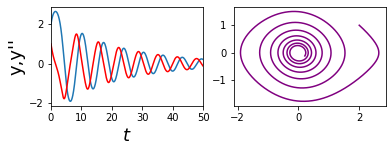

In [49]:
#pendulo forçado e amortecido
t0=0
tf=50
y0=2
z0=1
h=0.01

def g(t,y,z):
    return -0.1*z-np.sin(y)

t_v=np.arange(t0,tf,h)
y_v=edo.Eul2(g,y0,z0,t0,tf,h)[0]
z_v=edo.Eul2(g,y0,z0,t0,tf,h)[1]

pl.subplot(2,2,1)
pl.plot(t_v,y_v)
pl.plot(t_v,z_v,'r')
pl.xlim(t0,tf)
pl.xlabel("$t$",fontsize=18)
pl.ylabel("y,y''",fontsize=18)

pl.subplot(2,2,2)
pl.plot(y_v,z_v,'purple')